In [1]:
import pandas as pd
import tensorflow as tf
from Analyser import Analyser

In [2]:
help(Analyser)

Help on class Analyser in module Analyser:

class Analyser(builtins.object)
 |  Analyser(dataframe: pandas.core.frame.DataFrame, features: list, target: str)
 |  
 |  Creates an analysing tool for pandas dataframes.
 |  Provide the dataset in the form of a dataframe, 
 |  feature names as a list and target name to use.
 |  The tool is an easy way to create basic neural
 |  networks of different depths and sizes.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataframe: pandas.core.frame.DataFrame, features: list, target: str)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  create_model(self, hNum: int, max_depth=4, two_way=False, activation='relu', softmax=False)
 |      hNum - number of neurons on the biggest hidden layer
 |      max_depth - max number of hidden layers
 |      two_way - if set to True layers are built as follows: first layer is twice the size of 
 |             the number of features and every following layer is double that 
 | 

In [3]:
from sklearn.datasets import load_wine
data = load_wine()
wine_df = pd.DataFrame(data['data'], columns=data.feature_names)
wine_df['class'] = data['target']
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
wine_analizer = Analyser(wine_df, data.feature_names, 'class')

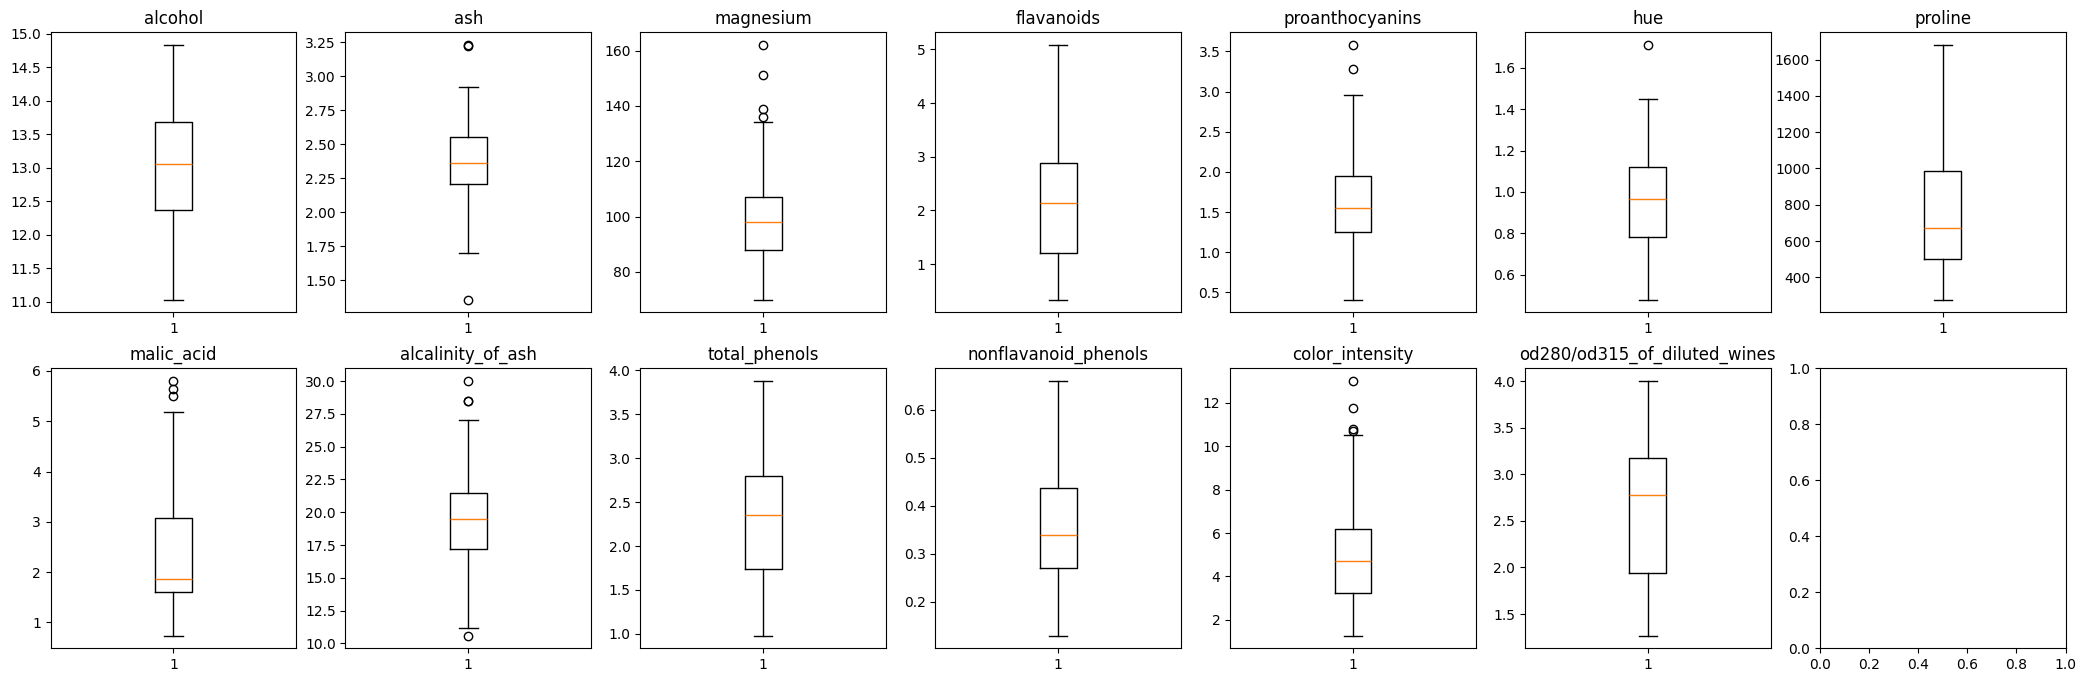

In [5]:
wine_analizer.show_boxplots()

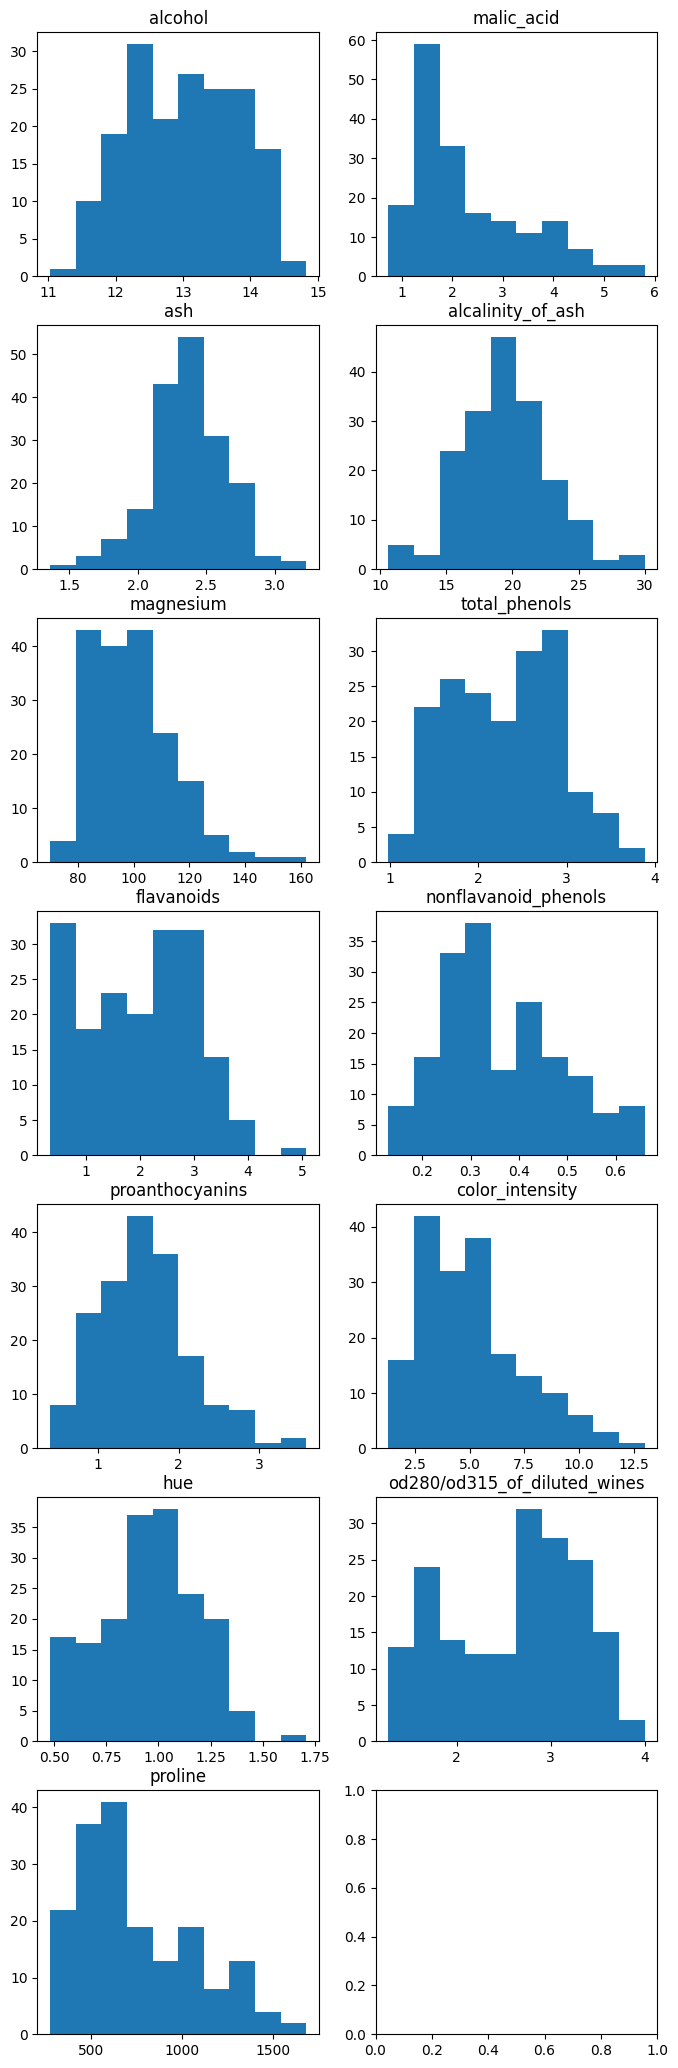

In [6]:
wine_analizer.show_histograms()

#### Basic model

In [7]:
wine_analizer.create_model(hNum=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 target (Dense)              (None, 3)                 33        
                                                                 
Total params: 523 (2.04 KB)
Trainable params: 523 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
wine_analizer.train_model(epochs = 100)

Training model.
History saved to self.results.


In [9]:
# wine_analizer.results.history

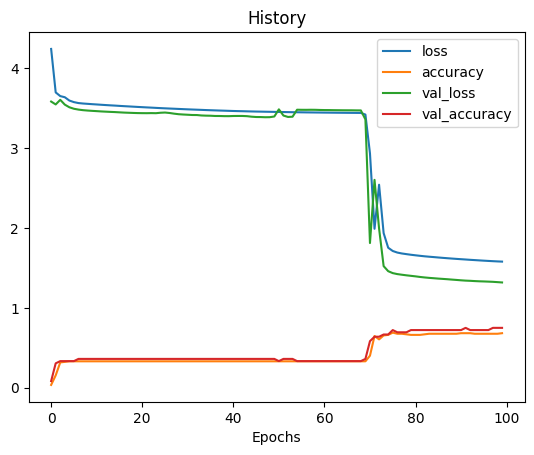

In [10]:
wine_analizer.show_history()

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.71      0.94      0.81        16
           2       0.00      0.00      0.00         8

    accuracy                           0.75        36
   macro avg       0.50      0.65      0.57        36
weighted avg       0.58      0.75      0.66        36



c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

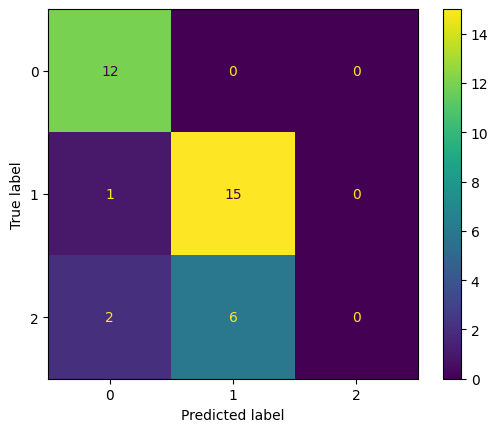

In [11]:
wine_analizer.show_results()

#### Analysing using callbacks and a model with 50 neurons on the biggest layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                700       
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 12)                312       
                                                                 
 target (Dense)              (None, 3)                 39        
                                                                 
Total params: 2326 (9.09 KB)
Trainable params: 2326 (9.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model with callbacks.

Epoch 117: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 120: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 123: ReduceLROnPlateau reducing learning rate to 1e-05.
Restoring model weights from the end of the best epoch: 119.
Epoch 129: early stopping
INFO:tensorflow:Assets written to: wine_50\assets


INFO:tensorflow:Assets written to: wine_50\assets


Best model saved to wine_50. History saved to self.results.
2/2 [==============================] - 0s 980us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



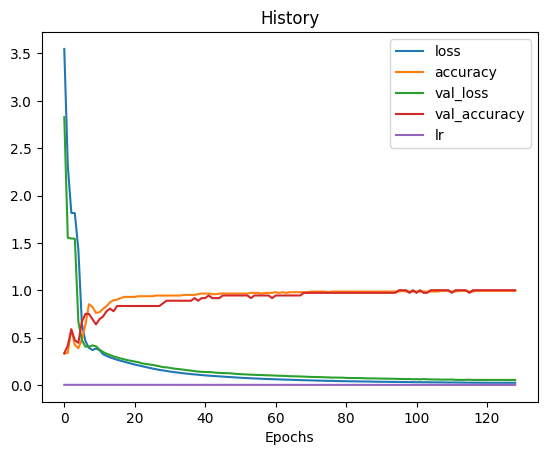

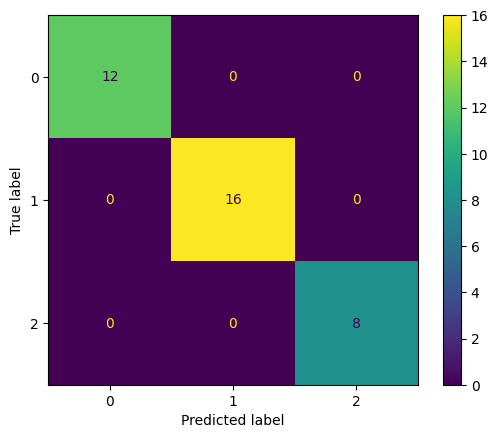

In [12]:
wine_analizer.create_model(50)
wine_analizer.train_model(500, are_callbacks=True, save = True, save_file='wine_50')
wine_analizer.show_history()
wine_analizer.show_results(load=True, load_path='wine_50')

#### Model with a higher neuron count, softmax activation and different optimizer settings. Once without callbacks and once with.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1400      
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 25)                1275      
                                                                 
 target (Dense)              (None, 3)                 78        
                                                                 
Total params: 7803 (30.48 KB)
Trainable params: 7803 (30.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.
2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



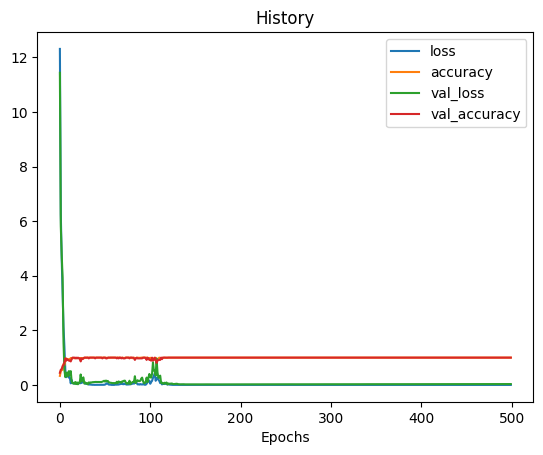

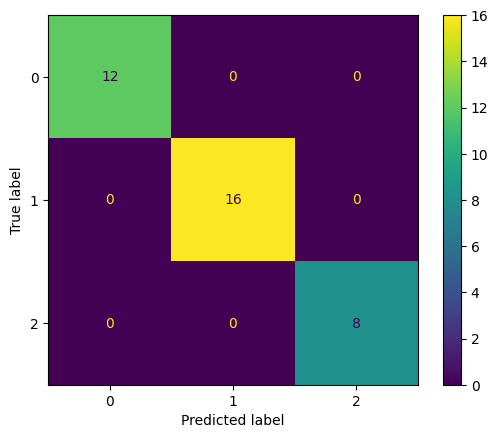

In [13]:
wine_analizer.create_model(100, activation='softmax')
wine_analizer.train_model(500, optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
wine_analizer.show_history()
wine_analizer.show_results()

Training model with callbacks.

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 15: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 18: ReduceLROnPlateau reducing learning rate to 1e-05.
Restoring model weights from the end of the best epoch: 9.
Epoch 19: early stopping
2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        16
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



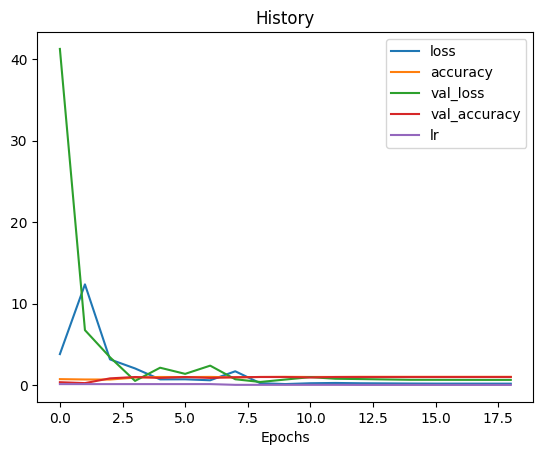

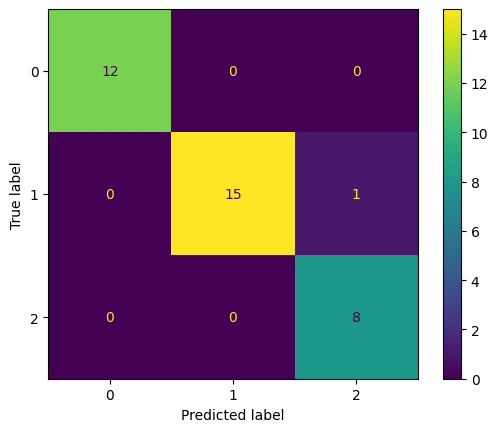

In [14]:
wine_analizer.train_model(500, optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), are_callbacks=True)
wine_analizer.show_history()
wine_analizer.show_results()

### Different models

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 40)                560       
                                                                 
 dense_9 (Dense)             (None, 20)                820       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 target (Dense)              (None, 3)                 33        
                                                                 
Total params: 1623 (6.34 KB)
Trainable params: 1623 (6.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.


2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



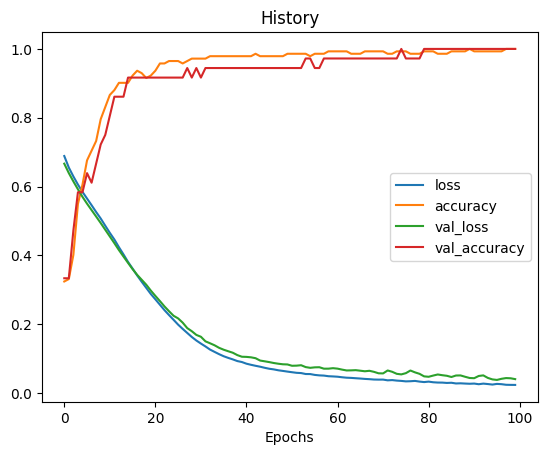

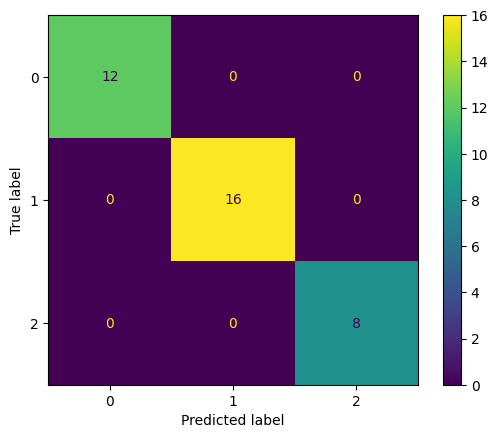

In [15]:
wine_analizer.create_model(40, activation='sigmoid')
wine_analizer.train_model(100)
wine_analizer.show_history()
wine_analizer.show_results()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                280       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 target (Dense)              (None, 3)                 33        
                                                                 
Total params: 523 (2.04 KB)
Trainable params: 523 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.


2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        16
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



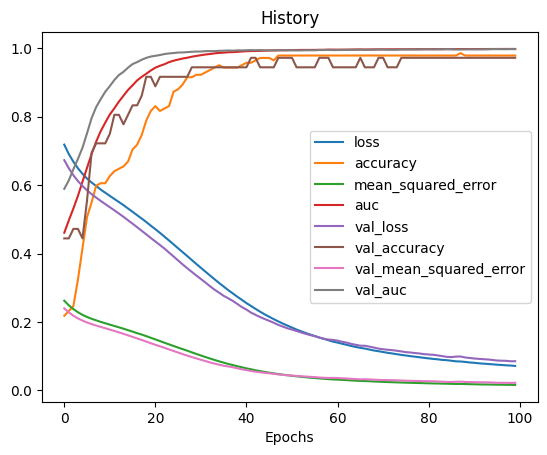

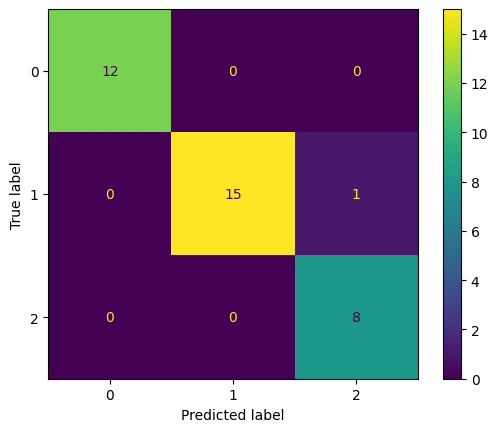

In [16]:
wine_analizer.create_model(20, activation='sigmoid')
wine_analizer.train_model(100, optimizer='adam', metrics=['accuracy',tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.AUC()])
wine_analizer.show_history()
wine_analizer.show_results()

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



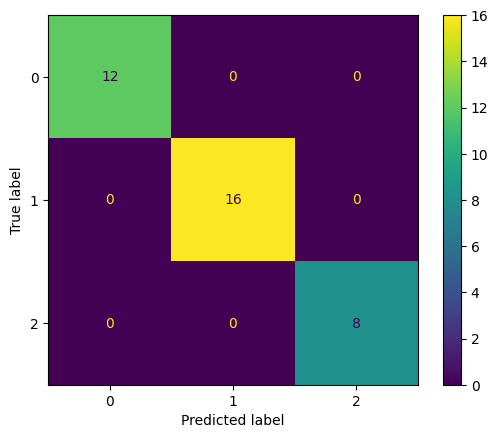

In [17]:
# Just to compare with one of the saved models
wine_analizer.show_results(load=True, load_path='wine_50') #

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1792      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 target (Dense)              (None, 3)                 99        
                                                                 
Total params: 12227 (47.76 KB)
Trainable params: 12227 (47.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.
2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



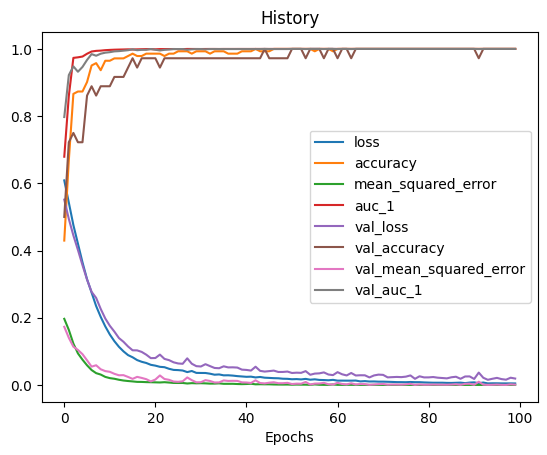

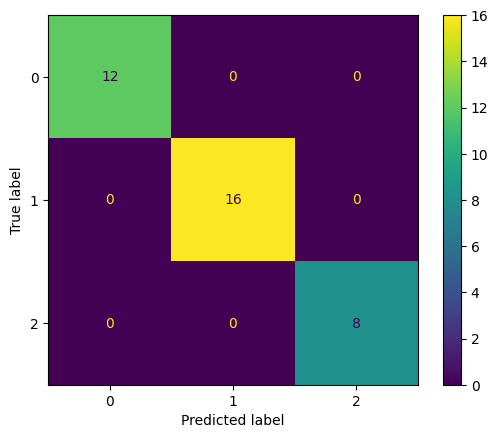

In [18]:
wine_analizer.create_model(128, activation='softmax')
wine_analizer.train_model(100, optimizer='adam', metrics=['accuracy',tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.AUC()])
wine_analizer.show_history()
wine_analizer.show_results()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1792      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 target (Dense)              (None, 3)                 27        
                                                                 
Total params: 12819 (50.07 KB)
Trainable params: 12819

c:\Users\48795\anaconda3\envs\Python3115-tensorflow\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training model.
History saved to self.results.
2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



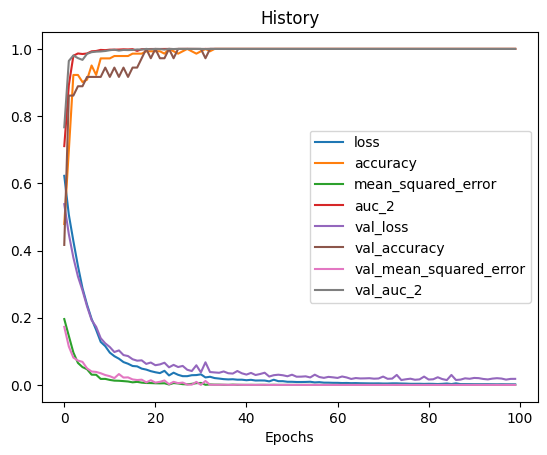

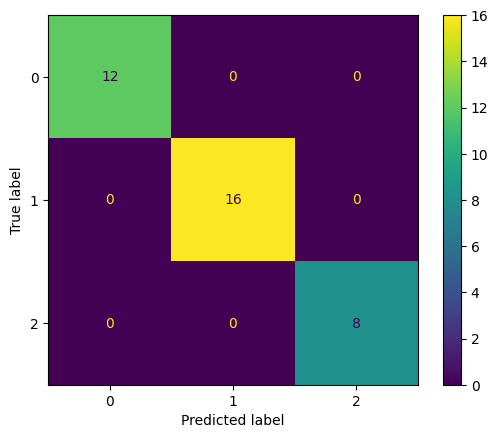

In [19]:
wine_analizer.create_model(128, max_depth=10, activation='softmax')
wine_analizer.train_model(100, optimizer='adam', metrics=['accuracy',tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.AUC()])
wine_analizer.show_history()
wine_analizer.show_results()